# WeatherPy

In [1]:
# Uncomment and run if citipy is not installed in your environment
# !pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90.000,90.000)
lng_range = (-180.000,180.000)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=lat_range[0], high=lat_range[1], size=1500)
lngs = np.random.uniform(low=lng_range[0], high=lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to the city list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

# Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).

In [4]:
# Create OpenWeatherMap url and define parameters to pass into it
weather_url = "http://api.openweathermap.org/data/2.5/weather?"

params={
    'q':'city name',
    # Make sure to add your OpenWeatherMap API to api_keys.py
    'appid': weather_api_key,
    'units': 'imperial'
}

In [5]:
# List of city data
city_data = []

# Print to logger
print('Beginning Data Retrieval')
print('------------------------')

# Create counters
record_count = 0
set_count = 0

# Loop through all the cities 
for index, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (index % 50 == 0):
        set_count += 1
        record_count = 0
    
    # Set city in endpoint url params
    params['q'] = city
    
    # Log the url, record, and set numbers
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    
    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(weather_url, params).json()
        
        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
        # Append the city information into city_data list
        city_data.append({'City': city,
                          'Latitude': city_lat,
                          'Longitude': city_lng,
                          'Max Temperature': city_max_temp,
                          'Humidity': city_humidity,
                          'Cloudiness': city_clouds,
                          'Wind Speed': city_wind,
                          'Country': city_country,
                          'Date': city_date})
    except:
        print('City not found. Skipping...')
        pass
    
    # Limit API calls to 60/minute to stay within free tier pricing of OpenWeatherMap API
    time.sleep(1)

# Indicate that data loading is complete
print('------------------------')
print('Data Retrieval Complete')
print('------------------------')

Beginning Data Retrieval
------------------------
Processing Record 0 of Set 1 | jacareacanga
Processing Record 1 of Set 1 | hamilton
Processing Record 2 of Set 1 | hithadhoo
Processing Record 3 of Set 1 | chuy
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | mount isa
Processing Record 6 of Set 1 | grindavik
Processing Record 7 of Set 1 | haines junction
Processing Record 8 of Set 1 | sao joao da barra
Processing Record 9 of Set 1 | bom jesus
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | half moon bay
Processing Record 12 of Set 1 | fairbanks
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | airai
Processing Record 15 of Set 1 | narsaq
Processing Record 16 of Set 1 | dikson
Processing Record 17 of Set 1 | sitka
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | ucluelet
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set 1 | perustica
Ci

Processing Record 35 of Set 4 | rafsanjan
Processing Record 36 of Set 4 | comodoro rivadavia
Processing Record 37 of Set 4 | nuevo casas grandes
Processing Record 38 of Set 4 | ponta do sol
Processing Record 39 of Set 4 | esperance
Processing Record 40 of Set 4 | kodiak
Processing Record 41 of Set 4 | independence
Processing Record 42 of Set 4 | skala
Processing Record 43 of Set 4 | taoudenni
Processing Record 44 of Set 4 | okha
Processing Record 45 of Set 4 | asau
Processing Record 46 of Set 4 | calama
Processing Record 47 of Set 4 | chokurdakh
Processing Record 48 of Set 4 | obihiro
Processing Record 49 of Set 4 | malabo
Processing Record 0 of Set 5 | sao felix do xingu
Processing Record 1 of Set 5 | muyezerskiy
Processing Record 2 of Set 5 | port augusta
Processing Record 3 of Set 5 | ust-tsilma
Processing Record 4 of Set 5 | chernyshevskiy
Processing Record 5 of Set 5 | zyryanovskiy
City not found. Skipping...
Processing Record 6 of Set 5 | souillac
Processing Record 7 of Set 5 | b

Processing Record 20 of Set 8 | xining
Processing Record 21 of Set 8 | scalloway
City not found. Skipping...
Processing Record 22 of Set 8 | la grande
Processing Record 23 of Set 8 | maple creek
Processing Record 24 of Set 8 | tyrma
Processing Record 25 of Set 8 | halalo
City not found. Skipping...
Processing Record 26 of Set 8 | kalavai
Processing Record 27 of Set 8 | pacific grove
Processing Record 28 of Set 8 | gravdal
Processing Record 29 of Set 8 | casma
Processing Record 30 of Set 8 | les cayes
Processing Record 31 of Set 8 | mango
Processing Record 32 of Set 8 | hanna
Processing Record 33 of Set 8 | egvekinot
Processing Record 34 of Set 8 | maniitsoq
Processing Record 35 of Set 8 | bere
Processing Record 36 of Set 8 | banff
Processing Record 37 of Set 8 | ligayan
Processing Record 38 of Set 8 | la rioja
Processing Record 39 of Set 8 | cidreira
Processing Record 40 of Set 8 | rorvik
Processing Record 41 of Set 8 | semey
Processing Record 42 of Set 8 | yeppoon
Processing Record 43

Processing Record 10 of Set 12 | tambopata
Processing Record 11 of Set 12 | plettenberg bay
Processing Record 12 of Set 12 | phan rang
City not found. Skipping...
Processing Record 13 of Set 12 | north bend
Processing Record 14 of Set 12 | padang
Processing Record 15 of Set 12 | langres
Processing Record 16 of Set 12 | conde
Processing Record 17 of Set 12 | kamaishi
Processing Record 18 of Set 12 | zhigansk
Processing Record 19 of Set 12 | illescas
Processing Record 20 of Set 12 | mattru
Processing Record 21 of Set 12 | anchorage
Processing Record 22 of Set 12 | soe
Processing Record 23 of Set 12 | naze
Processing Record 24 of Set 12 | tabas
Processing Record 25 of Set 12 | colares
Processing Record 26 of Set 12 | itapirapua
Processing Record 27 of Set 12 | sistranda
Processing Record 28 of Set 12 | kieta
Processing Record 29 of Set 12 | dakar
Processing Record 30 of Set 12 | omsukchan
Processing Record 31 of Set 12 | rio de jesus
Processing Record 32 of Set 12 | aksarka
Processing Rec

## Convert Raw Data to DataFrame
* Export the city data inta a .csv
* Display the DataFrame

In [6]:
# Convert array of JSONs into Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_df['Latitude']
max_temps = city_data_df['Max Temperature']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

# Export the city data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_df.count()

City               560
Latitude           560
Longitude          560
Max Temperature    560
Humidity           560
Cloudiness         560
Wind Speed         560
Country            560
Date               560
dtype: int64

In [7]:
# Display the city dataframe
city_data_df.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,jacareacanga,-6.22,-57.75,83.35,35,0,1.57,BR,1597444430
1,hamilton,39.18,-84.53,82.40,65,20,7.00,US,1597444251
2,hithadhoo,-0.60,73.08,82.04,75,89,8.63,MV,1597444260
3,chuy,-33.70,-53.46,52.59,92,76,6.04,UY,1597444434
4,punta arenas,-53.15,-70.92,33.80,80,90,4.70,CL,1597444435


## Plotting the Data
* Plot data and label with date of analysis
* Save the plots as .pngs

In [8]:
# Create a title, label x/y-axes, and annotate linear regression lines
def label_plot(title, x_label, y_label, line_eq = ''):
    # Get the coordinates of the axes to know where to annotate
    bottom, top = plt.ylim()
    left, right = plt.xlim()
    
    plt.title(f'{title} {time.strftime("%x")}')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate(line_eq,(left+10,bottom+10),fontsize=15,color='red')
    plt.grid(True)   

#### Latitude vs. Temperature Plot

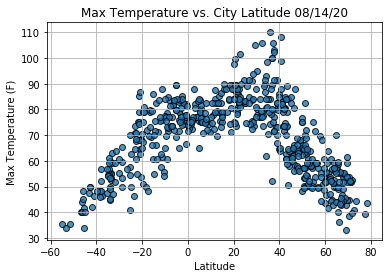

In [9]:
# Build scatter plot for Latitude vs. Temperature
plt.scatter(lats,
            max_temps,
            edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')

# Incorporate the other graph properties
label_plot('Max Temperature vs. City Latitude',
           'Latitude', 'Max Temperature (F)')

# Save the figure
plt.savefig('../output_data/Max_Temp_vs_Latitude.png')

# Show the plot
plt.show()

#### Latitude vs. Humidity Plot

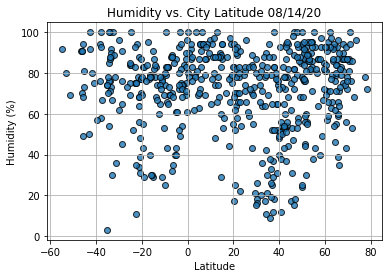

In [10]:
# Build scatter plot for Latitude vs. Humidity
plt.scatter(lats,
            humidity,
            edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')

# Incorporate the other graph properties
label_plot('Humidity vs. City Latitude', 'Latitude', 'Humidity (%)')

# Save the figure
plt.savefig('../output_data/Humidity_vs_Latitude.png')

# Show the plot
plt.show()

#### Latitude vs. Cloudiness Plot

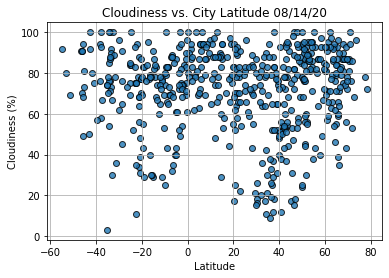

In [11]:
# Build scatter plot for Latitude vs. Cloudiness
plt.scatter(lats,
            humidity,
            edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')

# Incorporate the other graph properties
label_plot('Cloudiness vs. City Latitude', 'Latitude', 'Cloudiness (%)')

# Save the figure
plt.savefig('../output_data/Cloudiness_vs_Latitude.png')

# Show the plot
plt.show()

#### Latitude vs. Wind Speed Plot

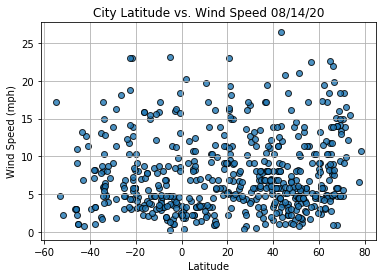

In [12]:
# Build scatter plot for Latitude vs. Wind Speed
plt.scatter(lats,
            wind_speed,
            edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')

# Incorporate the other graph properties
label_plot('City Latitude vs. Wind Speed', 'Latitude', 'Wind Speed (mph)')

# Save the figure
plt.savefig('../output_data/Wind_Speed_vs_Latitude.png')

# Show the plot
plt.show()

## Linear Regression

In [13]:
# Create a function to create linear regression plots
def linear_regress(title,x_values, y_values,x_label,y_label):
    
    # Run regression on given values 
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Create line to display the linear regression
    regress_values = x_values * slope + intercept
    
    # String of regression equation
    line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, 'r-')
    label_plot(title, x_label, y_label, line_eq)
    
    # Display the r-squared value to see how well the data fits the line
    print(f'The r-squared value is: {rvalue**2}')

In [14]:
# Separate data into Northern and Southern Hemisphere DataFrames
northernHemisphere_df = city_data_df.loc[city_data_df['Latitude']>0]
southernHemisphere_df = city_data_df.loc[city_data_df['Latitude']<0]

#### Nothern Hemisphere - Max Temp vs Latitude Linear Regression

The r-squared value is: 0.5088982688684454


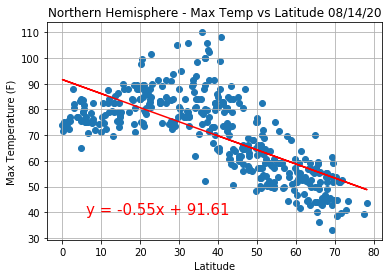

In [15]:
# Set table parameters
title = 'Northern Hemisphere - Max Temp vs Latitude'
x_values = northernHemisphere_df['Latitude']
y_values = northernHemisphere_df['Max Temperature']
x_label = 'Latitude'
y_label = 'Max Temperature (F)'

# Build scatter plot and linear regression for Max Temp vs Latitude
linear_regress(title, x_values, y_values, x_label, y_label)

# Save the figure
plt.savefig('../output_data/Max_Temp_vs_Latitude_North.png')

#### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.6858950338302711


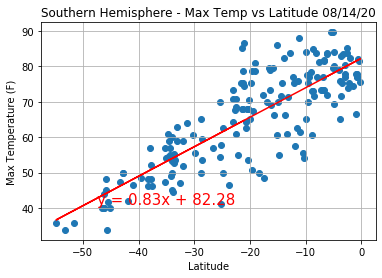

In [16]:
# Set table parameters
title = 'Southern Hemisphere - Max Temp vs Latitude'
x_values = southernHemisphere_df['Latitude']
y_values = southernHemisphere_df['Max Temperature']
x_label = 'Latitude'
y_label = 'Max Temperature (F)'

# Build scatter plot and linear regression for Max Temp vs Latitude
linear_regress(title, x_values, y_values, x_label, y_label)

# Save the figure
plt.savefig('../output_data/Max_Temp_vs_Latitude_South.png')

#### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 1.1960118061119702e-05


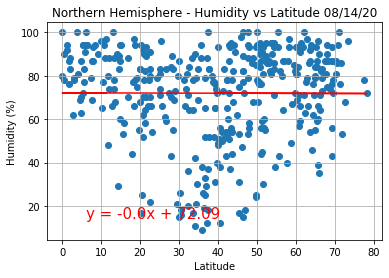

In [17]:
# Set table parameters
title = 'Northern Hemisphere - Humidity vs Latitude'
x_values = northernHemisphere_df['Latitude']
y_values = northernHemisphere_df['Humidity']
x_label = 'Latitude'
y_label = 'Humidity (%)'

# Build scatter plot and linear regression for Humidity vs Latitude
linear_regress(title, x_values, y_values, x_label, y_label)

# Save the figure
plt.savefig('../output_data/Humidity_vs_Latitude_North.png')

#### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.013142593655649926


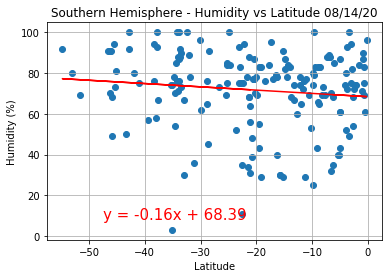

In [18]:
# Set table parameters
title = 'Southern Hemisphere - Humidity vs Latitude'
x_values = southernHemisphere_df['Latitude']
y_values = southernHemisphere_df['Humidity']
x_label = 'Latitude'
y_label = 'Humidity (%)'

# Build scatter plot and linear regression for Humidity vs Latitude
linear_regress(title, x_values, y_values, x_label, y_label)

# Save the figure
plt.savefig('../output_data/Humidity_vs_Latitude_South.png')

#### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.001232704451303501


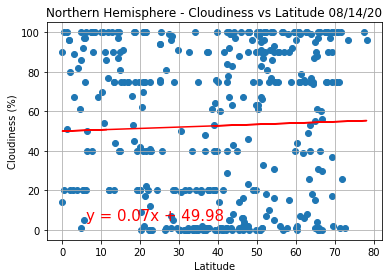

In [19]:
# Set table parameters
title = 'Northern Hemisphere - Cloudiness vs Latitude'
x_values = northernHemisphere_df['Latitude']
y_values = northernHemisphere_df['Cloudiness']
x_label = 'Latitude'
y_label = 'Cloudiness (%)'

# Build scatter plot and linear regression for Cloudiness vs Latitude
linear_regress(title, x_values, y_values, x_label, y_label)

# Save the figure
plt.savefig('../output_data/Cloudiness_vs_Latitude_North.png')

#### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.010587563422606193


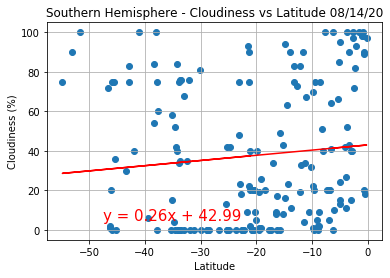

In [20]:
# Set table parameters
title = 'Southern Hemisphere - Cloudiness vs Latitude'
x_values = southernHemisphere_df['Latitude']
y_values = southernHemisphere_df['Cloudiness']
x_label = 'Latitude'
y_label = 'Cloudiness (%)'

# Build scatter plot and linear regression for Cloudiness vs Latitude
linear_regress(title, x_values, y_values, x_label, y_label)

# Save the figure
plt.savefig('../output_data/Cloudiness_vs_Latitude_South.png')

#### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.019211124841448865


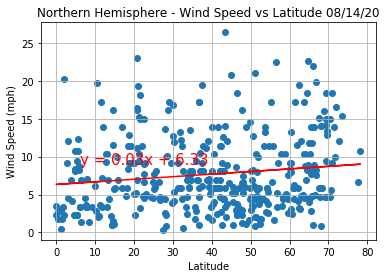

In [21]:
# Set table parameters
title = 'Northern Hemisphere - Wind Speed vs Latitude'
x_values = northernHemisphere_df['Latitude']
y_values = northernHemisphere_df['Wind Speed']
x_label = 'Latitude'
y_label = 'Wind Speed (mph)'

# Build scatter plot and linear regression for Wind Speed vs Latitude
linear_regress(title, x_values, y_values, x_label, y_label)

# Save the figure
plt.savefig('../output_data/Wind_Speed_vs_Latitude_North.png')

#### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.00015228254829863322


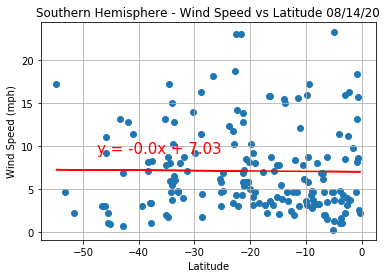

In [22]:
# Set table parameters
title = 'Southern Hemisphere - Wind Speed vs Latitude'
x_values = southernHemisphere_df['Latitude']
y_values = southernHemisphere_df['Wind Speed']
x_label = 'Latitude'
y_label = 'Wind Speed (mph)'

# Build scatter plot and linear regression for Wind Speed vs Latitude
linear_regress(title, x_values, y_values, x_label, y_label)

# Save the figure
plt.savefig('../output_data/Wind_Speed_vs_Latitude_South.png')